In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [233]:
df1 = pd.read_excel('completeClean.xls')
df = pd.DataFrame(df1)
df

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
1,1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,2,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
3,3,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
4,4,2,122,audi,gas,std,two,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,199,-1,95,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
200,200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
201,201,-1,95,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
202,202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [234]:
df.drop('Unnamed: 0', axis = 1, inplace= True)

In [235]:
# Dealing with dummy variable
dummy_1 = pd.get_dummies(df['aspiration'])
dummy_1.rename(columns= {'std':'aspiration-std', 'turbo':'aspiration-turbo'}, inplace = True)
df = pd.concat([df,dummy_1], axis=1)

In [236]:
df.drop(['aspiration'], axis=1,inplace=True)

In [237]:
# Exploratory Data Analysis
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,aspiration-std,aspiration-turbo
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,200.000000,200.000000,204.000000,202.000000,202.000000,204.000000,204.000000,200.000000,204.000000,204.000000
mean,0.823529,122.000000,98.806373,0.836497,65.916667,53.749020,2555.602941,126.892157,3.329050,3.258300,10.148137,104.222772,5125.990099,25.240196,30.769608,13205.690000,0.818627,0.181373
std,1.239035,31.758944,5.994144,0.059405,2.146716,2.424901,521.960820,41.744569,0.274044,0.314868,3.981000,39.810182,480.443680,6.551513,6.898337,7966.982558,0.386274,0.386274
min,-2.000000,65.000000,86.600000,0.678039,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000
25%,0.000000,101.000000,94.500000,0.799135,64.075000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.575000,70.000000,4800.000000,19.000000,25.000000,7775.000000,1.000000,0.000000
50%,1.000000,122.000000,97.000000,0.832292,65.500000,54.100000,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10270.000000,1.000000,0.000000
75%,2.000000,137.000000,102.400000,0.880346,66.900000,55.500000,2939.250000,142.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.500000,16500.750000,1.000000,0.000000
max,3.000000,256.000000,120.900000,1.000000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000,1.000000


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

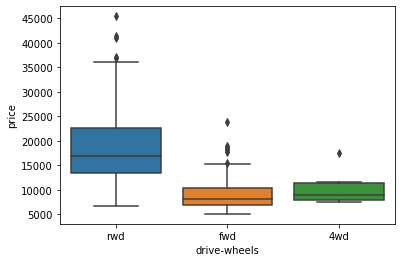

In [238]:
df['drive-wheels'].value_counts()
x= df['drive-wheels']
y = df['price']
sns.boxplot(x,y)

TypeError: 'tuple' object is not callable

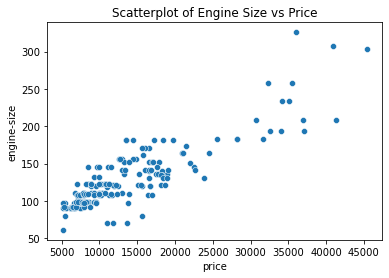

In [239]:
yi = df['engine-size']
xi = df['price']
sns.scatterplot(x=xi,y=yi)
plt.title('Scatterplot of Engine Size vs Price')
plt.ylim(0,)

<AxesSubplot:xlabel='None-body-style', ylabel='drive-wheels'>

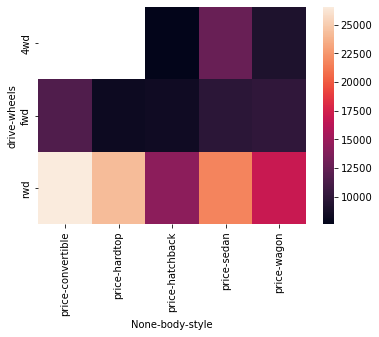

In [ ]:
# Groupby
df_test = df[['drive-wheels','body-style', 'price']]
df_grp = df_test.groupby(['drive-wheels','body-style'], as_index=False).mean()
df_pvt = df_grp.pivot(index='drive-wheels',columns='body-style')
sns.heatmap(df_pvt)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='make', ylabel='price'>

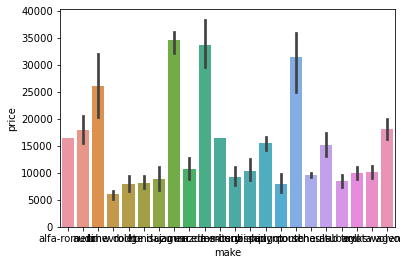

In [ ]:
# Analysis of VArax.intersection
tii = df['price']
xoo = df['make']
sns.barplot(xoo,tii)

In [ ]:
df_anova = df[['make','price']]
df_grpAno = df_anova.groupby(['make'])
ano1 = stats.f_oneway(df_grpAno.get_group('honda')['price'],df_grpAno.get_group('subaru')['price'])
ano1

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

In [ ]:
anovoJag= stats.f_oneway(df_grpAno.get_group('honda')['price'],df_grpAno.get_group('jaguar')['price'])
anovoJag

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

In [ ]:
df['engine-size']

0      130
1      152
2      109
3      136
4      136
      ... 
199    141
200    141
201    173
202    145
203    141
Name: engine-size, Length: 204, dtype: int64

TypeError: 'tuple' object is not callable

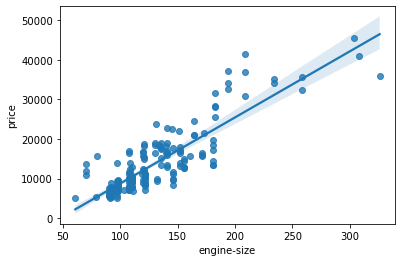

In [ ]:
# Correlation
# Visualizing using scatterplot of engine size and price
sns.regplot(x='engine-size', y ='price', data=df)
plt.ylim(0,)
# There is strong positive correlation among the variable

(0.0, 48195.98028990505)

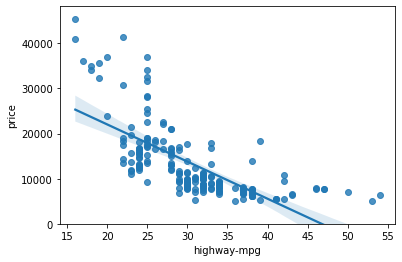

In [ ]:
# correlation coefficient of highway-mpg and price
sns.regplot(x='highway-mpg',y='price',data=df)
plt.ylim(0,)
#There is negative correlation among the variables

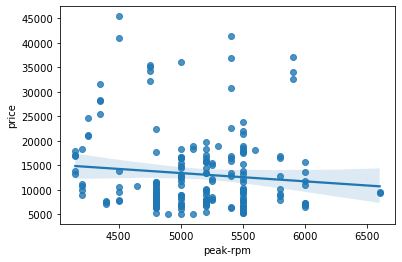

In [ ]:
# Finding the correlation coefficient of peak-rmp and price
sns.regplot(x='peak-rpm',y='price',data=df)
plt.ylim=(0,)
# there is weak correlation among the variables

In [ ]:
# Finding total number of columns names in the dataframe
k = df.columns
k

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'aspiration-std', 'aspiration-turbo', 'aspiration-std',
       'aspiration-turbo'],
      dtype='object')

In [ ]:
df['price']

0      16500.0
1      16500.0
2      13950.0
3      17450.0
4      15250.0
        ...   
199    16845.0
200    19045.0
201    21485.0
202    22470.0
203    22625.0
Name: price, Length: 204, dtype: float64

In [ ]:
df['price'].isnull().value_counts()

False    198
True       4
Name: price, dtype: int64

In [240]:
df['horsepower'].isnull().value_counts()

False    202
True       2
Name: horsepower, dtype: int64

In [241]:
df = df.dropna()

In [242]:
stats.pearsonr(df['horsepower'],df['price'])

(0.8125111557614215, 2.090918839931244e-46)

In [ ]:
df['horsepower'].isnull().value_counts()

True    198
Name: horsepower, dtype: int64